<a href="https://colab.research.google.com/github/dinilsonpedroza/Jupyter/blob/main/deflacionamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEFLACIONAMENTO**
------
***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from urllib.request import urlopen ### Bibliotecas que serão usadas no trabalho.

Na raspagem de dados usamos uma função do *Pandas* que permite trazer para nosso espaço de trabalho um objeto arquivado em **Json** (Java Script Object Notation, formato ideal para transferência de arquivos). Para que a operação seja possível, é necessário que o site onde pegamos os dados disponha de **API** (Application Programming Interface, rotinas que facilitam a transferênica de dados em sites nos quais eles esteja arquivados). Como pretendemos apresentar o PIB em termos nominais, a séries trabalhadas serão: **PIB per capita nominal** e **índice de preços**. Ambas do IBGE.

**PIB per capita nominal**
---


In [38]:
linkPIBpc= 'https://apisidra.ibge.gov.br/values/t/6784/n1/all/v/9812/p/all/d/v9812%202' ### PIB pc nominal. Este endereço foi pego no SIDRA - IBGE.

In [39]:
DFPIBpc = pd.read_json(linkPIBpc) ### Usando a função read_json para fazer a raspagem de dados com o link anterior.

In [40]:
DFPIBpc.head() ### Visualizando o início da tabela que foi pega (um data frame).

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Ano (Código),Ano
1,1,Brasil,38,Reais,5219.36,1,Brasil,9812,PIB per capita - valores correntes,1996,1996
2,1,Brasil,38,Reais,5729.02,1,Brasil,9812,PIB per capita - valores correntes,1997,1997
3,1,Brasil,38,Reais,5944.92,1,Brasil,9812,PIB per capita - valores correntes,1998,1998
4,1,Brasil,38,Reais,6359.80,1,Brasil,9812,PIB per capita - valores correntes,1999,1999


In [41]:
type(DFPIBpc) ### Verificando o tipo de objeto criado: data frame.

pandas.core.frame.DataFrame

In [42]:
PIBpc = DFPIBpc.drop([0], axis=0) ### Excluindo a primeira linha do data frame, para facilitar a leitura.

In [43]:
PIBpc.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
1,1,Brasil,38,Reais,5219.36,1,Brasil,9812,PIB per capita - valores correntes,1996,1996
2,1,Brasil,38,Reais,5729.02,1,Brasil,9812,PIB per capita - valores correntes,1997,1997
3,1,Brasil,38,Reais,5944.92,1,Brasil,9812,PIB per capita - valores correntes,1998,1998
4,1,Brasil,38,Reais,6359.80,1,Brasil,9812,PIB per capita - valores correntes,1999,1999
5,1,Brasil,38,Reais,6900.62,1,Brasil,9812,PIB per capita - valores correntes,2000,2000


In [44]:
pibpc = PIBpc[["V", "D3C"]] ### Criando um outro data frame só com os valores que interessam.

In [45]:
pibpc.head()

,V,D3C
1,5219.36,1996
2,5729.02,1997
3,5944.92,1998
4,6359.80,1999
5,6900.62,2000


In [46]:
pibpc.rename(columns={'D3C': 'Anos'}, inplace = True) ### Renomeando a coluna de datas (de D3C para Anos).

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Apesar no nome da variável ("Anos") se referir a uma unidade de tempo, a coluna não é, para o Python, uma coluna de datas. Precisamos transformá-la em tempo. Uma das formas é a empregada a seguir: vamos fazer com que a coluna "Index", que sempre consta nos data frames, seja considerada, ela, a coluna do tempo.

In [47]:
pibpc.index = pd.to_datetime(pibpc['Anos']) ### Estamos aqui substituindo a coluna Index pela de datas do próprio arquivo.

In [48]:
pibpc.head()

,V,Anos
Anos,,
1996-01-01,5219.36,1996
1997-01-01,5729.02,1997
1998-01-01,5944.92,1998
1999-01-01,6359.80,1999
2000-01-01,6900.62,2000


Notem que a terceira coluna do data frame *pibpc* é redundante. Vamos tratar de excluí-la.

In [49]:
pibpcdf = pibpc.drop(pibpc.columns[[1]], axis=1, inplace=True) ### Atenção para as mudanças de nomes, não são obrigatórias.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
PIBPC = pibpc.astype(float) ### Convertendo a arquivo para uma formato númerico (float). Atenção para a mudança de nome, mais uma vez.

In [162]:
PIBPC.head()

,V
Anos,
1996-01-01,5219.36
1997-01-01,5729.02
1998-01-01,5944.92
1999-01-01,6359.80
2000-01-01,6900.62


In [98]:
PIBPC.tail()

,V
Anos,
2015-01-01,29466.85
2016-01-01,30558.75
2017-01-01,31843.95
2018-01-01,33593.82
2019-01-01,35161.70


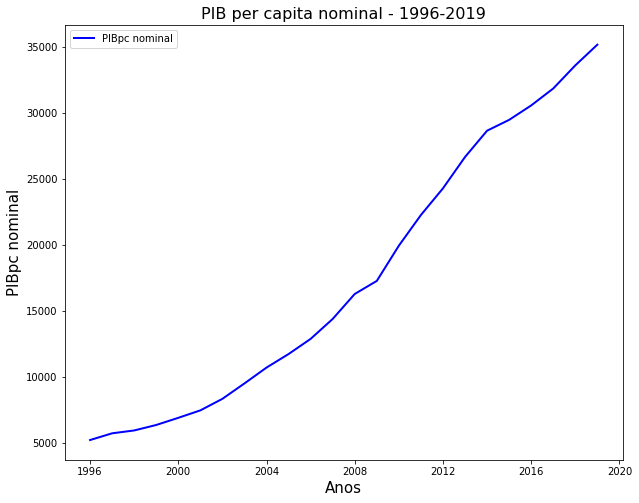

In [52]:
plt.rcParams['figure.figsize'] = (10,8)
plt.title('PIB per capita nominal - 1996-2019',fontsize = 16)
plt.plot(PIBPC.V,lw =2, label = 'PIBpc nominal', c= 'b') ### estou fazendo um gráfico da śerie "V".
plt.ylabel("PIBpc nominal",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')

**IPCA**
---

**Instruções para pegar a série do IPCA no Sidra-IBGE**

 Nesse endereço, você pega o endereço JSON da **tabela 1737** do SIDRA-IBGE: https://sidra.ibge.gov.br/tabela/1737 .


Na página da tabela 1737, as seleções que você deve fazer são as seguintes: **Variável:** IPCA - Número-índice (base: dezembro de 1993 = 100) (Número-índice): 13 de 13 casas decimais.
**Mês:** Clique na lupa e escreva "dezembro". Marque os anos de 1995 até 2019 (para bater com a série de PIB per capita nominal).
Clique no botão "Links de compartilhar" no fim de página.
Copie o endereço de **Parâmetros para API**. Esse endereço será usado no comando seguinte.

In [101]:
linkIPCA = 'https://apisidra.ibge.gov.br/values/t/1737/n1/all/v/2266/p/199612,199712,199812,199912,200012,200112,200212,200312,200412,200512,200612,200712,200812,200912,201012,201112,201212,201312,201412,201512,201612,201712,201812,201912/d/v2266%2013'

In [102]:
DFIPCA = pd.read_json(linkIPCA) ### Usando a função read_json para fazer a raspagem de dados com o link anterior.

In [104]:
DFIPCA.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Mês (Código),Mês
1,1,Brasil,30,Número-índice,1363.2400000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199612,dezembro 1996
2,1,Brasil,30,Número-índice,1434.4600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199712,dezembro 1997
3,1,Brasil,30,Número-índice,1458.2000000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199812,dezembro 1998
4,1,Brasil,30,Número-índice,1588.5600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199912,dezembro 1999


In [105]:
IPCA = DFIPCA.drop([0], axis=0) ### Excluindo a primeira linha do data frame, para facilitar a leitura.

In [106]:
IPCA.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
1,1,Brasil,30,Número-índice,1363.2400000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199612,dezembro 1996
2,1,Brasil,30,Número-índice,1434.4600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199712,dezembro 1997
3,1,Brasil,30,Número-índice,1458.2000000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199812,dezembro 1998
4,1,Brasil,30,Número-índice,1588.5600000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,199912,dezembro 1999
5,1,Brasil,30,Número-índice,1683.4700000000000,1,Brasil,2266,IPCA - Número-índice (base: dezembro de 1993 =...,200012,dezembro 2000


Por causa da maneira como as datas aparecem nesse data frame, é mais interessante incluir uma coluna de datas em um data frame com os valores.

In [107]:
ipca = IPCA[["V"]] ### Criando um outro data frame só com os valores que interessam.

In [108]:
ipca.head()

,V
1,1363.2400000000000
2,1434.4600000000000
3,1458.2000000000000
4,1588.5600000000000
5,1683.4700000000000


In [109]:
Ipca = ipca.astype(float) ### Convertendo a arquivo para uma formato númerico (float).

In [110]:
Ipca['Anos'] = pd.date_range(start='1996', periods=len(ipca['V']), freq='Y') ### Acrescentando uma coluna de datas (anos), já no formato de datas do Python.

In [111]:
Ipca.head()

,V,Anos
1,1363.24,1996-12-31
2,1434.46,1997-12-31
3,1458.20,1998-12-31
4,1588.56,1999-12-31
5,1683.47,2000-12-31


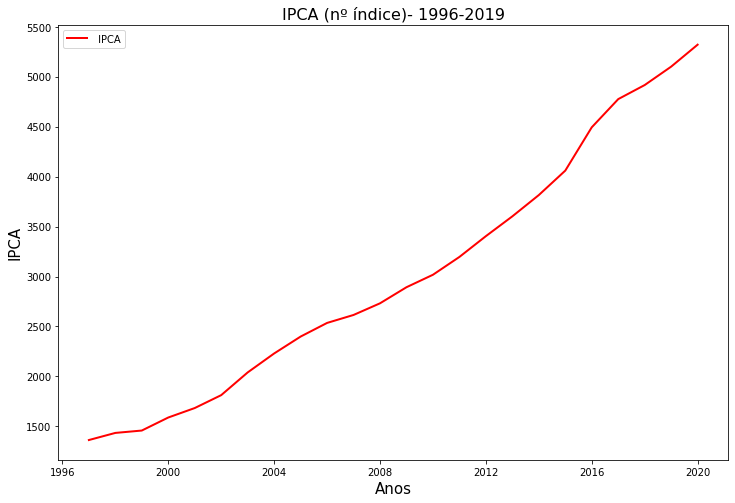

In [112]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('IPCA (nº índice)- 1996-2019',fontsize = 16)
plt.plot(Ipca.Anos,Ipca.V,lw =2, label = ' IPCA', c= 'r')
plt.ylabel("IPCA",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')

Para deflacionar a série do PIB per capita nominal e apresentá-la a preços de 2019, precisamos multiplicar a série pelo fator: $IPCA_{2019}/IPCA_i$.

In [113]:
Ipca.tail() ### Verificando qual o IPCA de 2019.

,V,Anos
20,4493.17,2015-12-31
21,4775.70,2016-12-31
22,4916.46,2017-12-31
23,5100.61,2018-12-31
24,5320.25,2019-12-31


In [114]:
ipca2019 = Ipca['V'].iloc[-1] ### Estamos selecionando a última lina da coluna de valores do Ipca.

In [115]:
ipca2019

5320.25

Precisamos agora multiplicar esse ipca2019 pelo inverso da coluna de valores de IPCA (ou seja, a coluna Ipca.V). Primeiro vamos tratar de inverter a coluna Ipca.V.

In [116]:
Inv_IPCA= np.power(Ipca.V, -1)

In [117]:
Inv_IPCA

1     0.000734
2     0.000697
3     0.000686
4     0.000630
5     0.000594
6     0.000552
7     0.000490
8     0.000449
9     0.000417
10    0.000394
11    0.000382
12    0.000366
13    0.000346
14    0.000331
15    0.000313
16    0.000294
17    0.000278
18    0.000262
19    0.000246
20    0.000223
21    0.000209
22    0.000203
23    0.000196
24    0.000188
Name: V, dtype: float64

In [118]:
mult = ipca2019*Inv_IPCA

In [119]:
mult

1     3.902651
2     3.708887
3     3.648505
4     3.349102
5     3.160288
6     2.935067
7     2.608247
8     2.386308
9     2.217769
10    2.098387
11    2.034474
12    1.947654
13    1.839097
14    1.763079
15    1.664716
16    1.563065
17    1.476838
18    1.394418
19    1.310452
20    1.184075
21    1.114025
22    1.082130
23    1.043062
24    1.000000
Name: V, dtype: float64

Finalmente, precisamos multiplicar essa coluna de mutiplicadores (*mult*) pela coluna com os valores dos PIB per capita nominais. Atençao: não se trata de uma multiplicação de vetores ou matrizes, mas de uma multiplicação de elemento a elemento de dois vetores de dimensões iguais. É o que em matemática se chama de produto Hadamard (em homenagem ao matemático francês Jacques Hadamard (1865-1963). Vamos usar a funções da biblioteca **numpy** na operação.

In [120]:
a = np.array([PIBPC['V']])

In [121]:
a

array([[ 5219.36,  5729.02,  5944.92,  6359.8 ,  6900.62,  7467.03,
         8340.58,  9506.76, 10705.99, 11733.45, 12880.52, 14390.01,
        16280.82, 17271.34, 19938.6 , 22259.91, 24278.35, 26657.54,
        28648.74, 29466.85, 30558.75, 31843.95, 33593.82, 35161.7 ]])

In [122]:
b = np.array([mult])

In [123]:
b

array([[3.90265104, 3.70888697, 3.64850501, 3.34910233, 3.16028798,
        2.93506744, 2.60824697, 2.38630808, 2.21776883, 2.09838684,
        2.03447353, 1.94765377, 1.83909695, 1.76307915, 1.66471624,
        1.56306464, 1.47683805, 1.39441839, 1.31045159, 1.18407494,
        1.11402517, 1.08213023, 1.04306152, 1.        ]])

In [124]:
c = np.multiply(a,b)

In [125]:
c

array([[20369.3407177 , 21248.28761694, 21690.07038129, 21299.62100896,
        21807.94641722, 21916.23664662, 21754.29249478, 22686.05819717,
        23743.41090887, 24621.31709494, 26205.07696985, 28026.75727316,
        29942.00638987, 30450.73937646, 33192.1113211 , 34793.6781641 ,
        35855.19106041, 37171.76414076, 37542.7869397 , 34890.95865781,
        34043.21663578, 34459.30099858, 35040.4208232 , 35161.7       ]])

In [126]:
PIBpc_real = pd.DataFrame(c)

In [127]:
PIBpc_real

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,20369.340718,21248.287617,21690.070381,21299.621009,21807.946417,21916.236647,21754.292495,22686.058197,23743.410909,24621.317095,26205.07697,28026.757273,29942.00639,30450.739376,33192.111321,34793.678164,35855.19106,37171.764141,37542.78694,34890.958658,34043.216636,34459.300999,35040.420823,35161.7


In [128]:
PIBpc_real = PIBpc_real.T

In [129]:
PIBpc_real

,0
0,20369.340718
1,21248.287617
2,21690.070381
3,21299.621009
4,21807.946417
5,21916.236647
6,21754.292495
7,22686.058197
8,23743.410909
9,24621.317095


In [130]:
PIBpc_real['Anos'] = pd.date_range(start='1996', periods=len(PIBpc_real), freq='Y') ### Acrescentando uma coluna de datas (anos), já no formato de datas do Python.

In [133]:
PIBpc_real

,0,Anos
0,20369.340718,1996-12-31
1,21248.287617,1997-12-31
2,21690.070381,1998-12-31
3,21299.621009,1999-12-31
4,21807.946417,2000-12-31
5,21916.236647,2001-12-31
6,21754.292495,2002-12-31
7,22686.058197,2003-12-31
8,23743.410909,2004-12-31
9,24621.317095,2005-12-31


In [154]:
PIBpc_real.columns = ['PIBpc', 'Anos']

In [166]:
PIBpc_real.head()

,PIBpc,Anos
0,20369.340718,1996-12-31
1,21248.287617,1997-12-31
2,21690.070381,1998-12-31
3,21299.621009,1999-12-31
4,21807.946417,2000-12-31


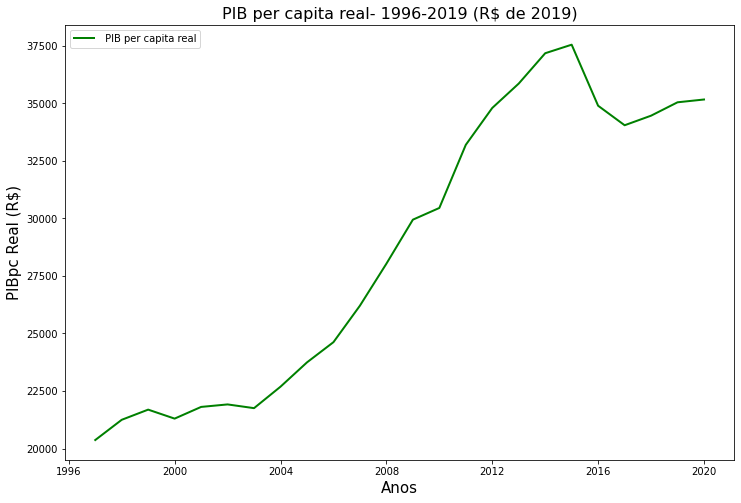

In [169]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('PIB per capita real- 1996-2019 (R$ de 2019)',fontsize = 16)
plt.plot(PIBpc_real.Anos, PIBpc_real.PIBpc,lw =2, label = ' PIB per capita real', c= 'g')
plt.ylabel("PIBpc Real (R$)",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')

Vamos agora juntar as duas séries, **PIBpc nominal** e **PIBpc real**, em um mesmo gráfico.

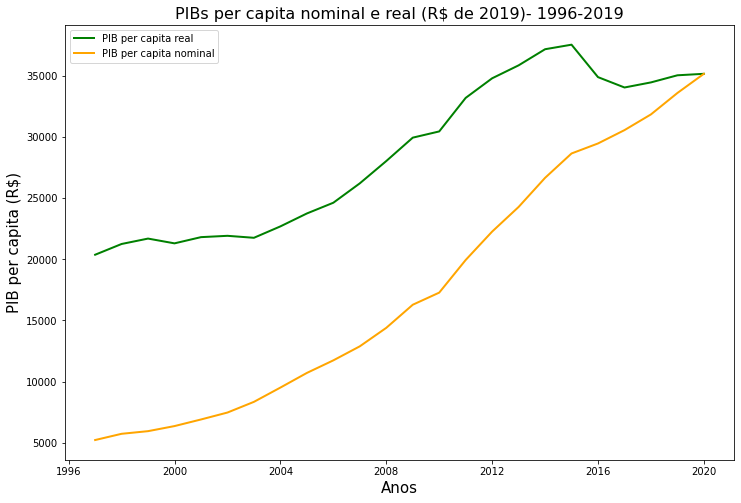

In [178]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('PIBs per capita nominal e real (R$ de 2019)- 1996-2019',fontsize = 16)
plt.plot(PIBpc_real.Anos, PIBpc_real.PIBpc,lw =2, label = 'PIB per capita real', c= 'g')
plt.plot(PIBpc_real.Anos, PIBPC.V, lw=2, label= 'PIB per capita nominal', c='orange')
plt.ylabel("PIB per capita (R$)",fontsize = 15)
plt.xlabel('Anos',fontsize = 15)
plt.legend(loc = 'upper left')
plt.savefig('pibpcnominal&real')